In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sovrasmorzato.csv'
fr = pd.read_csv(FILE)

In [28]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (Volt)'])
sigmaV = 0.04 / np.sqrt(12)

C = 0.000000099
R = 10000 #ohm 1%
L = 0.082

Vg = 4 #Volt

w2 = 1 / (L*C)
γ = R / (2*L)
β = np.sqrt(γ**2 - w2)

$
V_r = V_0 \cdot e^{-\gamma t} \cdot (\exp(\beta t) - \exp(-\beta t))
$

In [29]:
def VR(t,V0,γ,β):
    return V0 * np.exp(-γ*t) * (np.exp(β*t) - np.exp(-β*t))

In [30]:
i = Interpolazione(t,V,VR,sigmaV,p0=[Vg,γ,β])
print(i)

   
Parameters: [7.64100241e+00 5.52371119e+04 5.42148737e+04] 
Sigma parameters: [4.10482872e-01 1.22756760e+05 1.22779693e+05]

sigmaY: 0.011547005383792516

chiquadro ridotto: 5183.03
df: 81
pvalue: 0.0%
covariance matrix: [[ 1.56675665e-01 -1.88643822e+04 -1.88869812e+04]
 [-1.88643822e+04  1.40120700e+10  1.40146852e+10]
 [-1.88869812e+04  1.40146852e+10  1.40173059e+10]]    



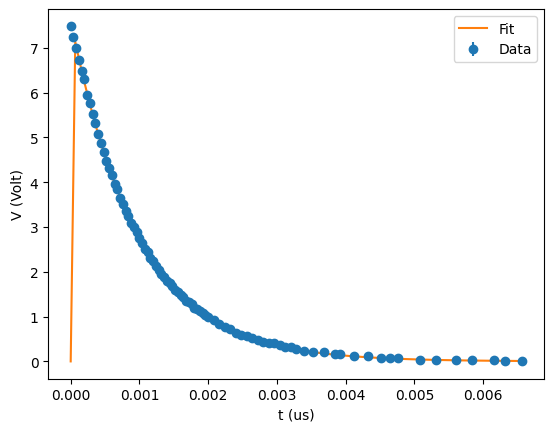

In [31]:
plt.errorbar(t, V, yerr=sigmaV, fmt='o', label='Data')
plt.plot(i.x_best, i.y_best, label='Fit')
plt.xlabel('t (us)')
plt.ylabel('V (Volt)')
plt.legend()
plt.show()
